In [5]:
# Enable interactive plot
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
import psutil
import collections


In [6]:
fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()

<IPython.core.display.Javascript object>

/home/hwan/miniconda3/lib/python3.8/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


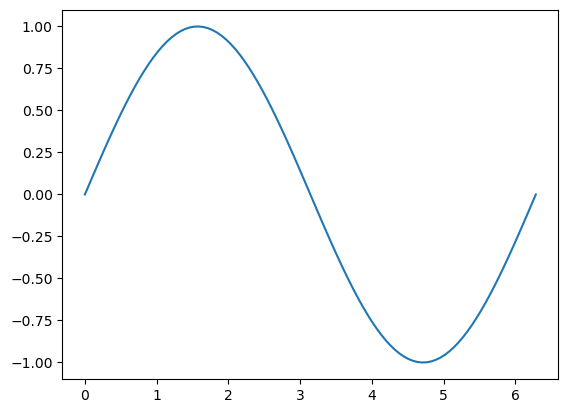

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

/home/hwan/miniconda3/lib/python3.8/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


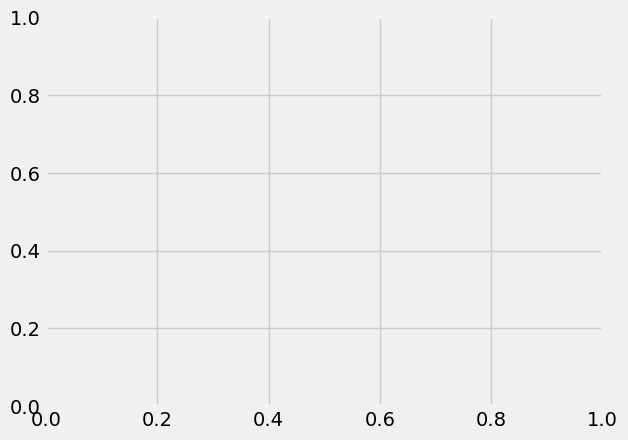

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from time import sleep

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()
sleep(10000)


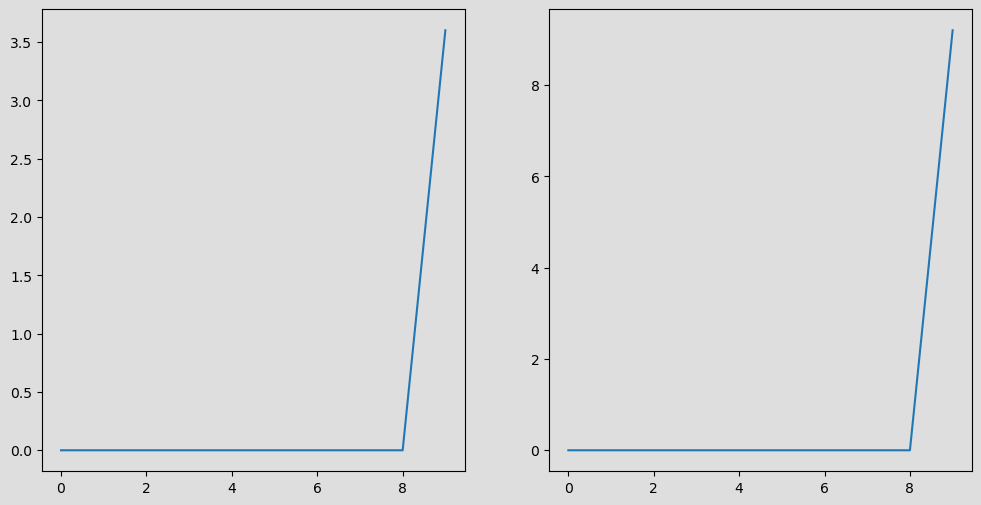

In [9]:
# function to update the data
def my_function():
    cpu.popleft()
    cpu.append(psutil.cpu_percent(interval=1))
    ax.plot(cpu)
    ram.popleft()
    ram.append(psutil.virtual_memory().percent)
    ax1.plot(ram)
# start collections with zeros
cpu = collections.deque(np.zeros(10))
ram = collections.deque(np.zeros(10))
# define and adjust figure
fig = plt.figure(figsize=(12,6), facecolor='#DEDEDE')
ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.set_facecolor('#DEDEDE')
ax1.set_facecolor('#DEDEDE')
# test
my_function()
plt.show()

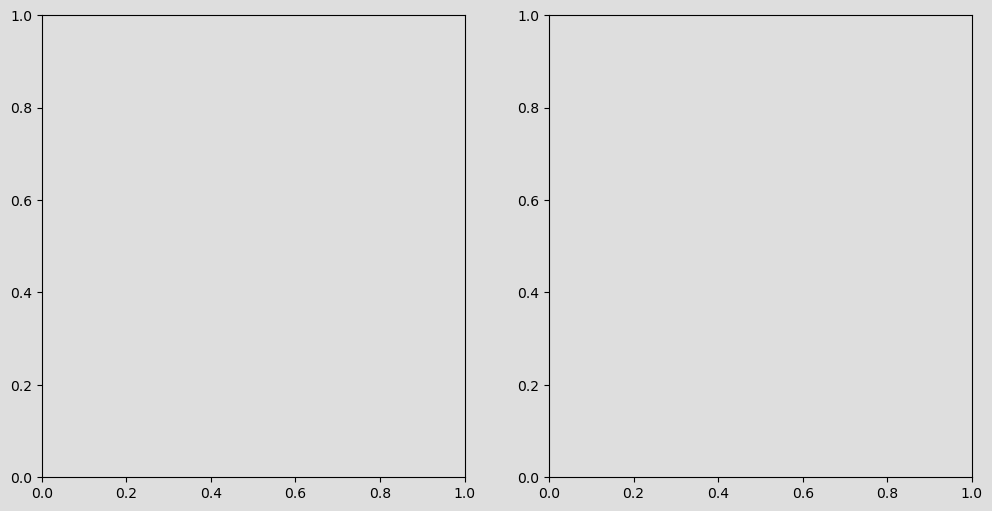

In [13]:
# function to update the data
def my_function(i):
    # get data
    cpu.popleft()
    cpu.append(psutil.cpu_percent())
    ram.popleft()
    ram.append(psutil.virtual_memory().percent)
    # clear axis
    ax.cla()
    ax1.cla()
    # plot cpu
    ax.plot(cpu)
    ax.scatter(len(cpu)-1, cpu[-1])
    ax.text(len(cpu)-1, cpu[-1]+2, "{}%".format(cpu[-1]))
    ax.set_ylim(0,100)
    # plot memory
    ax1.plot(ram)
    ax1.scatter(len(ram)-1, ram[-1])
    ax1.text(len(ram)-1, ram[-1]+2, "{}%".format(ram[-1]))
    ax1.set_ylim(0,100)
# start collections with zeros
cpu = collections.deque(np.zeros(10))
ram = collections.deque(np.zeros(10))
# define and adjust figure
fig = plt.figure(figsize=(12,6), facecolor='#DEDEDE')
ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.set_facecolor('#DEDEDE')
ax1.set_facecolor('#DEDEDE')
# animate
ani = FuncAnimation(fig, my_function, interval=100)
plt.show()

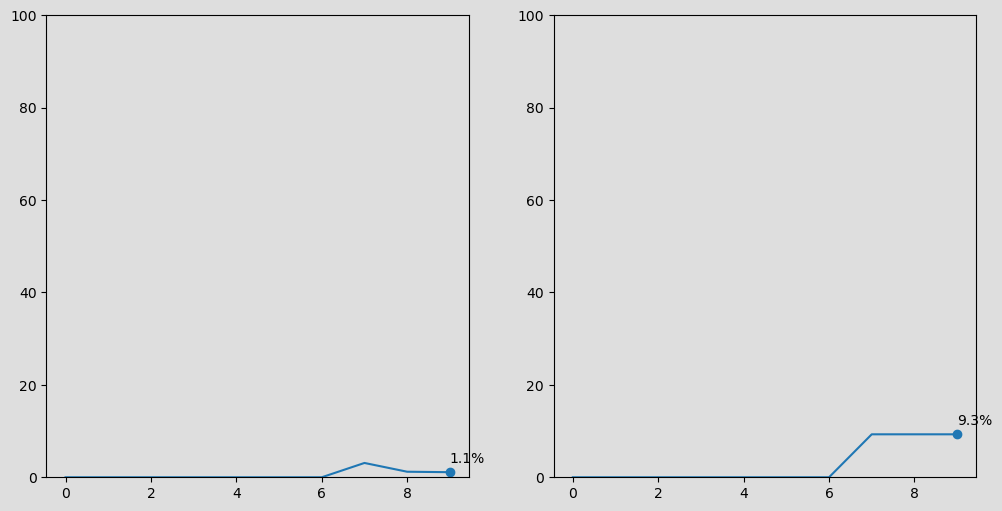

In [12]:
# function to update the data
def my_function():
    # get data
    cpu.popleft()
    cpu.append(psutil.cpu_percent(interval=1))
    ram.popleft()
    ram.append(psutil.virtual_memory().percent)
    # clear axis
    ax.cla()
    ax1.cla()
    # plot cpu
    ax.plot(cpu)
    ax.scatter(len(cpu)-1, cpu[-1])
    ax.text(len(cpu)-1, cpu[-1]+2, "{}%".format(cpu[-1]))
    ax.set_ylim(0,100)
    # plot memory
    ax1.plot(ram)
    ax1.scatter(len(ram)-1, ram[-1])
    ax1.text(len(ram)-1, ram[-1]+2, "{}%".format(ram[-1]))
    ax1.set_ylim(0,100)
# start collections with zeros
cpu = collections.deque(np.zeros(10))
ram = collections.deque(np.zeros(10))
# define and adjust figure
fig = plt.figure(figsize=(12,6), facecolor='#DEDEDE')
ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.set_facecolor('#DEDEDE')
ax1.set_facecolor('#DEDEDE')
# test
my_function()
my_function()
my_function()
plt.show()

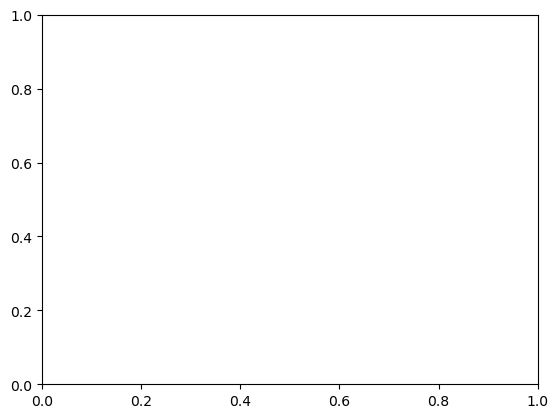

In [21]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#import tmp102

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []

# Initialize communication with TMP102
#tmp102.init()
l = [x for x in range(100)]

# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    # Read temperature (Celsius) from TMP102
    #temp_c = round(tmp102.read_temp(), 2)
    print(i)
    if i<100:
      temp_c = l[i]
    
    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    #ys.append(temp_c)
    ys.append(0.1)
    
    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('TMP102 Temperature over Time')
    plt.ylabel('Temperature (deg C)')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=10)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()
while 1:
    print(ani)